In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
df = pd.read_csv("https://raw.githubusercontent.com/FabioGagliardiIts/ai_ml_python/main/Lezione_14/dati_prenotazioni_2.csv")
display(df)

,prenotazioni,pizze,eventi bar,turisti
0,50,56,1,1200
1,83,95,0,1623
2,71,80,0,1467
3,109,124,0,2456
4,10,40,1,940
...,...,...,...,...
95,71,99,0,1954
96,76,81,0,1332
97,89,101,0,1256
98,69,101,0,1024


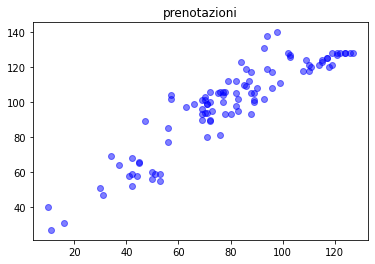

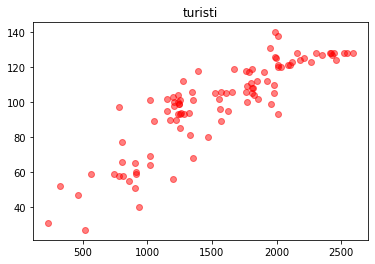

In [ ]:
prenotazioni = df['prenotazioni'].to_numpy()
turisti = df['turisti'].to_numpy()
pizze = df['pizze'].to_numpy()


plt.scatter(prenotazioni, pizze, color='blue', alpha=0.5)
plt.title("prenotazioni")
plt.show()


plt.scatter(turisti, pizze, color='red', alpha=0.5)
plt.title("turisti")
plt.show()




Una seconda colonna di feature espande il numero di variabili della nostra equazione lineare di partenza.

In questo caso si pazza ad uno spazio a tre dimensioni con i valori delle pizze dipendenti dalle variabili delle prenotazioni e dei turisti.

# **Dalla retta all'iperpiano**

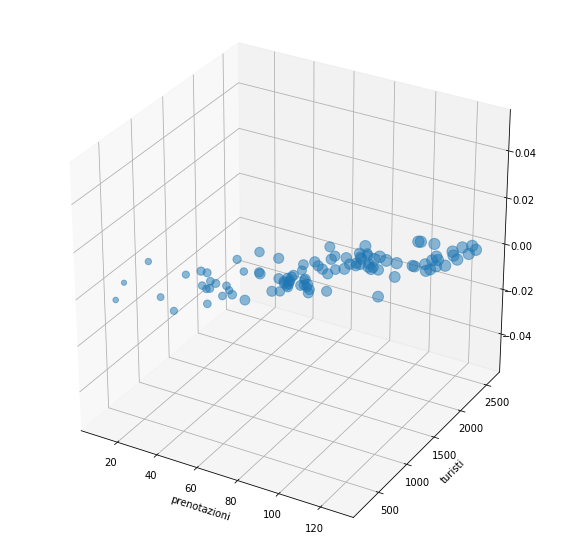

In [ ]:
plt.figure(figsize=(10,10))
plt.axes(projection ="3d")
plt.scatter(prenotazioni, turisti, pizze, alpha = 0.5)
plt.xlabel('prenotazioni')
plt.ylabel('turisti')
plt.show()

Quando un problema è definito in uno spazio a tre o più dimensioni, la retta che caratterizza la regressione lineare, così come l'abbiamo usata fin'ora, perde di significato. 

Va necessariamente riscritta tenendo conto delle dimensioni aggiunte, aumentando il numero di coefficienti.

Avremo quindi una nuova equazione dove il risultato sarà dato dalla combinazione lineare delle **features**:


\begin{align}
  y = ax + a_1x_1 + a_2x_2 +....a_nx_n + b
\end{align}

Da un punto di vista geometrico non avremo più una retta ma un **iperpiano**.

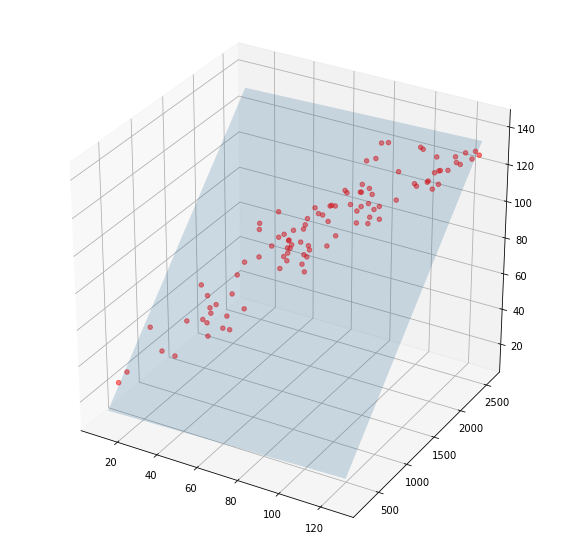

In [ ]:


plt.figure(figsize=(10,10))

ax = plt.axes(projection='3d')

px_1 = np.linspace(np.min(prenotazioni), np.max(prenotazioni), 100)
px_2 = np.linspace(np.min(turisti),      np.max(turisti),      100)
px_1, px_2 = np.meshgrid(px_1, px_2)

py = 0.03 * px_1 + 0.05 * px_2 + 1.09

ax.plot_surface(px_1, px_2, py, alpha=0.2)
ax.scatter3D(prenotazioni, turisti, pizze, color="red", alpha = 0.5)

plt.show()

# **Accenni di algebra lineare**

Per capire cosa avviene nei modelli a più variabili, occorre dare uno sguardo rapido all'interno della branca della matematica che si occupa di matrici, vettori e "spazi geometrici": l'algebra lineare

Tralasciamo le rispettive descrizioni formali e guardiamo agli elementi fondamentali di questa materia attraverso la libreria numpy.

## **vettori**

Possiamo vederli come le singole righe di un DataFrame o un array di numpy. 
La dimensione di un vettore è data dalla sua lunghezza. In uno spazio bidimensionale potremmo vedere come le coordinate di un punto disegnato tra gli assi cartesiani.

\begin{align}
\vec{a}  = \begin{pmatrix}
                3 \\ 2   
          \end{pmatrix} 
\end{align}

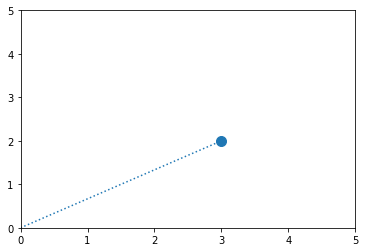

In [ ]:
# un vettore di due dimensioni
vec_a = np.array([3, 2])

pt_x = vec_a[0]
pt_y = vec_a[1]
# plt.scatter(pt_x, pt_y)
# plt.quiver()
# plt.show()

plt.scatter(pt_x, pt_y, s = 100)
plt.plot([0,pt_x], [0, pt_y], ls = ':')
plt.ylim(0,5)
plt.xlim(0,5)
plt.show()


Un'operazione da ricordare è il prodotto **scalare (dot product)**  tra due vettori che da come risultato un singolo valore, detto appunto **scalare**.

\begin{align}
           \vec{a} \cdot \vec{b} =
          \begin{bmatrix}
                3 \ \ \ \ 2   
          \end{bmatrix} \cdot
          \begin{bmatrix}
                4 \\
                5   
          \end{bmatrix} = (3 \ \times \ 4) + (2 \ \times \ 5) = 12 + 10 = 22 
\end{align}

In [ ]:
vec_b = np.array([4, 5])

print(np.dot(vec_a, vec_b))

22


## **matrici**

Possiamo vederle come l'insieme delle righe e delle colonne di un dataframe o di una matrice di numpy $NxN$

\begin{align}
M  = \begin{bmatrix}
                4  & 1 \\
                3 &  2   
          \end{bmatrix} 
\end{align}

In [ ]:
M = np.array([[4, 1],
              [3, 2]])
print(M)


[[4 1]
 [3 2]]


Scambiando righe e colonne si ottiene la **trasposta** di una matrice

In [ ]:
M_t = M.T
print(M_t)

[[4 3]
 [1 2]]


Una matrice può anche rappresentare la trasformazione di un vettore attraverso la moltiplicazione. 

\begin{align}
   M \times \vec{a} =
          \begin{bmatrix}
                  4  & 1 \\
                3 &  2    
          \end{bmatrix} \cdot
          \begin{bmatrix}
                3 \\
                2   
          \end{bmatrix} = 
           \begin{bmatrix}
                (4 \times 3) + (1 \times 2) \\
                (3 \times 3) + (2 \times 2)  
          \end{bmatrix} = 
           \begin{bmatrix}
                14 \\
                13  
          \end{bmatrix} = \vec{c}
\end{align}          

In [ ]:
vec_c = np.dot(M, vec_a)
print(vec_c)

[14 13]


Potremmo definire le "trasformazioni" ottenute dalle matrici come delle funzioni a più dimensioni. E alcune matrici, esattamente come le funzioni, possono anche avere una propria "inversa" che inverte, apputno, la trasformazione base. 

\begin{align}
M^{-1}  = \begin{bmatrix}
                -5  & -2 \\
                -4 &  -3   
          \end{bmatrix} 
\end{align}

\begin{align}
   M^{-1} \times \vec{c} = \vec{a}
\end{align}    

In [ ]:
M_inv = np.linalg.inv(M)
print("matrice inversa: ", M_inv)

print("\n", np.dot(M_inv, vec_c))

matrice inversa:  [[ 0.4 -0.2]
 [-0.6  0.8]]

 [3. 2.]


Se consideriamo le matrici come un'estensione dei vettori è facile intuire come la moltiplicazione tra matrici non sia altro che un prodotto scalare tra le righe di una e le colonne dell'altra.

\begin{align}
   M \times L =
          \begin{bmatrix}
                  4  & 1 \\
                3 &  2    
          \end{bmatrix} \cdot
          \begin{bmatrix}
                3 & 5\\
                2 & 7  
          \end{bmatrix} = 
           \begin{bmatrix}
                (4 \times 3) + (1 \times 2) & (4 \times 5) + (1 \times 7)
                \\ 
                (3 \times 3) + (2 \times 2) & (3 \times 5) + (2 \times 7)
          \end{bmatrix} = 
           \begin{bmatrix}
                14 & 27 \\
                13 & 29 
          \end{bmatrix} = H
\end{align}    

In [ ]:
L = np.array([[3, 5], 
             [2, 7]])

H = np.dot(M, L)

print(H)

[[14 27]
 [13 29]]


# **La regressione lineare multipla**

Riprendiamo alla nostra equazione lineare di partenza.

\begin{align}
  y = ax + a_1x_1 + a_2x_2 +....a_nx_n + b
\end{align}

Se pensiamo alle righe del nostro dataset e al prodotto scalare tra vettori, è facile rivedere l'equazione dell'iperpiano come:

\begin{align}
 \vec{x}_n \cdot \vec{a}_n + b =
          \begin{bmatrix}
                x^{1}_{n} \ \ \ \ x^{2}_{n}  
          \end{bmatrix} \cdot
          \begin{bmatrix}
                a_{1} \\
                a_{2}  
          \end{bmatrix} + b = y_n
\end{align}

dove per ogni riga $n$ si ha:
- $x^{1}_{n}= prenotazioni[n]$ 
- $x^{2}_{n} = turisti[n]$
- $y   = pizza[n]$



Considerando un dataframe come una matrice formata da $N$ righe e $M$ colononne possiamo ricrivere l'equazione su cui si basa il modello della regressione multipla come:

\begin{align}
    D \times \vec{a} + b = \vec{y}
\end{align}

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression



# SPLIT
x_train, x_test, y_train, y_test = train_test_split(prenotazioni.reshape(-1, 1), pizze, test_size=0.3)


# ADDESTRAMENTO
lr = LinearRegression()
lr.fit(x_train, y_train)


LinearRegression()